In [34]:
keep_hmdb51 = ["clap", "climb", "drink", "jump", "pour", "ride_bike", "ride_horse",
               "run", "shoot_bow", "smoke", "throw", "wave"]
mapping = {class_name: i for i, class_name in enumerate(keep_hmdb51)}
mapping.update({v: k for k, v in mapping.items()})
mapping

{'clap': 0,
 'climb': 1,
 'drink': 2,
 'jump': 3,
 'pour': 4,
 'ride_bike': 5,
 'ride_horse': 6,
 'run': 7,
 'shoot_bow': 8,
 'smoke': 9,
 'throw': 10,
 'wave': 11,
 0: 'clap',
 1: 'climb',
 2: 'drink',
 3: 'jump',
 4: 'pour',
 5: 'ride_bike',
 6: 'ride_horse',
 7: 'run',
 8: 'shoot_bow',
 9: 'smoke',
 10: 'throw',
 11: 'wave'}

In [1]:
# Load data pickle
import pickle

model_variation = "model3"  # Either {"model2", "model3"}
resize = (112, 112)  # Make all images the same size

with open(f"./data/{model_variation}_{resize[0]}.pickle", "rb") as filter:
    X_train, y_train, X_val, y_val, X_test, y_test = pickle.load(filter)

print(f"{X_train.shape=}; {y_train.shape=}; {X_val.shape=}; {y_val.shape=}; {X_test.shape=}; {y_test.shape=}")


X_train.shape=(756, 112, 112, 2); y_train.shape=(756, 12); X_val.shape=(84, 112, 112, 2); y_val.shape=(84, 12); X_test.shape=(360, 112, 112, 2); y_test.shape=(360, 12)


In [3]:
# Check if labels are correct
import numpy as np

print(f"{np.argmax(y_train[0])=}; {np.argmax(y_train[1])=}; {np.argmax(y_train[2])=}; {np.argmax(y_train[3])=}; {np.argmax(y_train[4])=};")

np.argmax(y_train[0])=3; np.argmax(y_train[1])=0; np.argmax(y_train[2])=11; np.argmax(y_train[3])=1; np.argmax(y_train[4])=11;


In [7]:
# Print first 10 labels
print(f"{y_train[:10]=}")

y_train[:10]=array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)


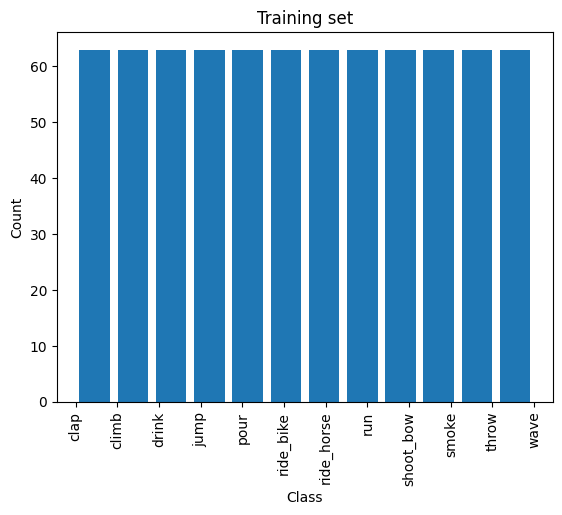

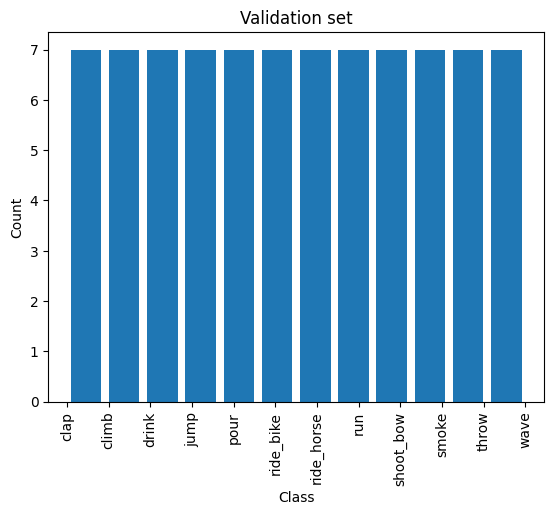

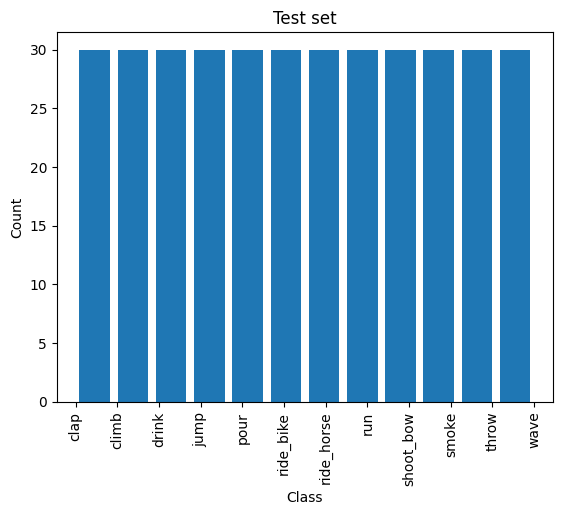

In [43]:
import matplotlib.pyplot as plt


def plot_histogram(y, title):
    plt.hist(np.argmax(y, axis=1), bins=12, rwidth=0.8)

    plt.xticks(np.arange(12), [mapping[i] for i in range(12)], rotation=90)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.title(title)
    plt.show()


plot_histogram(y_train, "Training set")
plot_histogram(y_val, "Validation set")
plot_histogram(y_test, "Test set")


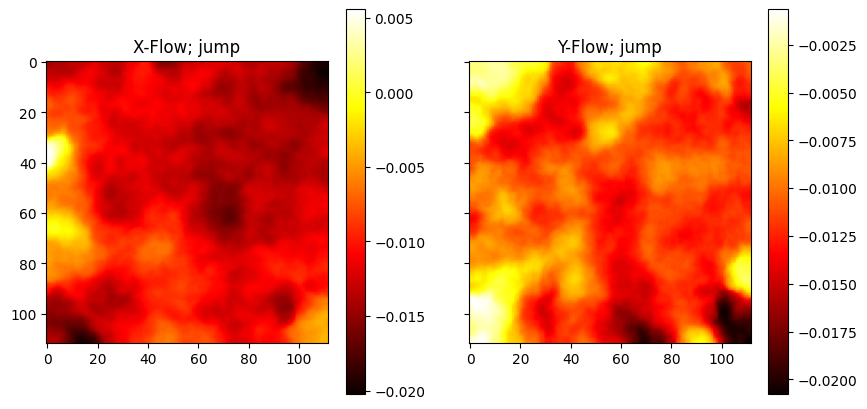

In [38]:
# Plot 2D Deepflow images
import matplotlib.pyplot as plt

# Load image
img = X_train[0]

# Plot image
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)
ax[0].imshow(img[:, :, 0], cmap="hot")
ax[1].imshow(img[:, :, 1], cmap="hot")

# Add cbar
fig.colorbar(ax[0].imshow(img[:, :, 1], cmap="hot"), ax=ax[0])
fig.colorbar(ax[1].imshow(img[:, :, 0], cmap="hot"), ax=ax[1])

label = np.argmax(y_train[0])
ax[0].set_title(f"X-Flow; {mapping[label]}")
ax[1].set_title(f"Y-Flow; {mapping[label]}")

plt.show()